<H1>Predict S&P 500 Index Using Commitments of Trader Report from Commodity Futures Trading Commission(CFTC)</H1>

<h3>By Chia Kok Sun</h3>

------------------------------------------------------------------------------------------------------------------------------------------------------
<h2>Objective:</h2>
<ul>
<li>To import the data from CSV file to process the data</li>
<li>To study various investor categories impact on S&P 500 index by counting their net position. We will use the linear regression model to achieve this. </li>
<li>To crosscheck the predicted equation by using test data. </li>
</ul>

<h4>Glossary for different investor catogories:</h4>
<ol>
    <li><b>Asset Manager/Institutional</b>: These are institutional investors, including pension funds, endowments, insurance companies, mutual funds and those portfolio/investment managers whose clients are predominantly institutional.</li>
<li><b>Dealer/Intermediary</b>: These participants are what are typically described as the “sell side” of the market. Though they may not predominately sell futures, they do design and sell various financial assets to clients. They tend to have matched books or offset their risk across markets and clients. Futures contracts are part of the pricing and balancing of risk associated with the products they sell and their activities. These include large banks (U.S. and non-U.S.) and dealers in securities, swaps and other derivatives.</li>
    <li><b>Non Reportables</b>: This is a category where do not required to disclose the position and mainly for retail investor.</li>
</ol>

-----------------------------------------------------------------------------------------------------------------------
<b>Previous Project</b>: Prior to study the data science officially, the project is mainly work on Google spreadsheet. You all may refer to Google Sheet 
<a href="https://docs.google.com/spreadsheets/d/1Y1OnOPnCrgvNdN7aG0rb8hox_J6azGZPwdPnGJN6f2g">Link</a> for the same studies.

-------------------------------------------------------------------------------------------------------------------------
<b>Data Preparation</b>: The Commitment of Trader(CoT) reports are released by Commodity Future and Trading Commision(CFTC) in weekly basis. CFTC is an autority to regulate future and option trading in US. You may see the webpage address or the domain name is <b>cftc.gov</b> or this is from goverment's website.
<pre>
    CFTC Financial Raw Data(in CSV format): <a href="https://www.cftc.gov/dea/newcot/FinComWk.txt">https://www.cftc.gov/dea/newcot/FinComWk.txt</a>
    CFTC Financial Data(in table format): <a href="https://www.cftc.gov/dea/options/financial_lof.htm">https://www.cftc.gov/dea/options/financial_lof.htm</a>
</pre>    
<b>Data Wrangling</b>: 
<pre>
    <p>1. The author started to collect the CFTC data using Google Sheet. For more information, please refer to <b>Previous Project</b> section. 
    <p>2. CFTC data do not record the current underlying index or for our case is S&P 500 index. We need to record the closing index when the report is generated.
    <p>3. After keying the date and the index number, we can go to "RAW" sheet and click the "UPDATE" button to download the CFTC data. Since CFTC data from above link is updated in weekly basis, our script will check the key in date is same as CFTC website(Latest Closing Date) for report generation. 
    <p>4. We are using CFTC raw data in CSV format and convert to meaningful table using Google sheet micro script.
    <p>5. We are using the net position to analyze our data. 
    <p>        Net Positions = Number of Long Positions - Number of Short Positions
</pre>
<b>Data Modeling</b>: 
<pre>
    <p>1. We are selected few investor categories which are Asset Manager/Instituional(We refer them as "<b>Smart Money</b>"), <b>Dealer</b> and non reportable(<b>Retail</b>) entity to analyze their impact and predict S&P500 Index.
    <p>2. Predictive model that we are using for this project is just linear regression on multiple invester categories. 
</pre>
<b>Model Training</b>: <p>We will use the whole year 2022 CFTC data for training. In 2022, S&P500 ranging from about 3502 to 4808.25. S&P 500 Index is recording at 4156.75 as of 4/22/2023. So, year 2022 data seems to be a good range for year 2023 market now. (S&P500 Index from investing.com)

<b>Model Deployment</b>: <p> Based on year 2022 CFTC training data, we will test the result in year 2023 to validate our prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

#https://github.com/koksunchia/ISS_Project/blob/main/CFTC_2022_RAW.csv
#Need to convert csv file to raw data using githubusercontent
url='https://raw.githubusercontent.com/koksunchia/ISS_Project/master/CFTC_2022_RAW.csv'

cftc_2022=pd.read_csv(url)
cftc_2022.head()
#index='S&P 500 Index'

y_index=cftc_2022[['S&P 500 Index']]
x_smart=cftc_2022[['Asset Manager/Institutional (Smart Money) Net position']]
x_dealer=cftc_2022[['Dealer Net Position']]
x_retail=cftc_2022[['Not Reportable (Retail) Net position']]



In [2]:
# Run Linear Regression on multiple investor categories
lr = LinearRegression()
lr.fit(x_smart,y_index)
smart_score=lr.score(x_smart,y_index)
smart_intercept=lr.intercept_[0]
smart_slope=lr.coef_[0][0]
#Intercept is single value for simple linear regression
smart_intercept
#coefficient is single value for simple linear regression
smart_slope

lr.fit(x_dealer,y_index)
dealer_score=lr.score(x_dealer,y_index)
dealer_intercept=lr.intercept_[0]
dealer_slope=lr.coef_[0][0]

lr.fit(x_retail,y_index)
retail_score=lr.score(x_retail,y_index)
retail_intercept=lr.intercept_[0]
retail_slope=lr.coef_[0][0]


(3400.0, 4860.73258014719)

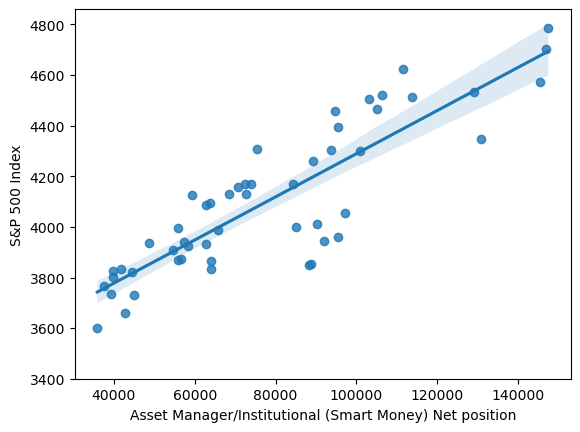

In [3]:
# Print the scatter plot
sns.regplot(x=x_smart,y=y_index)
plt.ylim(3400,)

(3400.0, 4843.5)

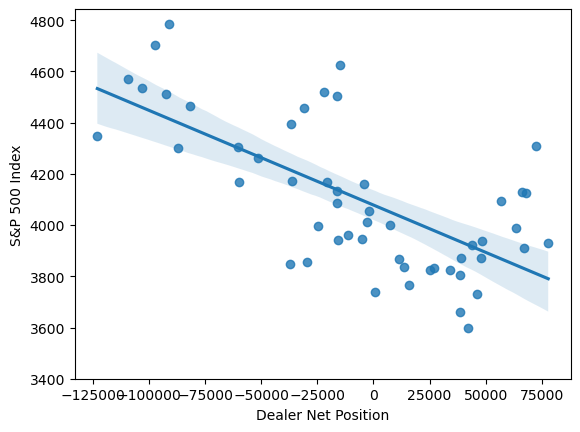

In [4]:
# Print the scatter plot
sns.regplot(x=x_dealer,y=y_index)
plt.ylim(3400,)

(3400.0, 4844.5090118420885)

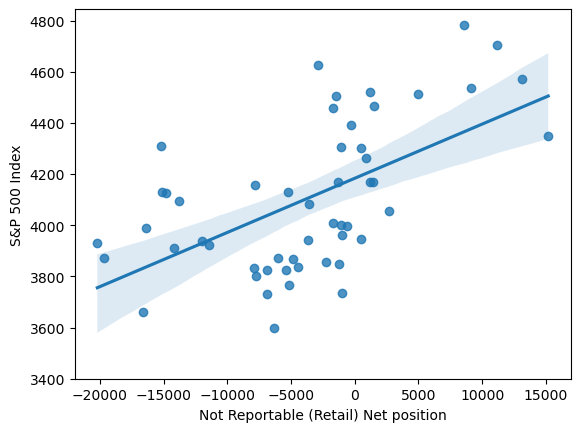

In [5]:
sns.regplot(x=x_retail,y=y_index)
plt.ylim(3400,)

In [6]:
# create Table
Prediction_Table={'Investor Category':['Smart Money','Dealer','Retail'],
                  'Score':[smart_score, dealer_score, retail_score],
                  'Slope':[smart_slope, dealer_slope, retail_slope],
                  'Intercept': [smart_intercept, dealer_intercept, retail_intercept]}
Prediction_Table_Summary = pd.DataFrame(Prediction_Table)
Prediction_Table_Summary.head()


,Investor Category,Score,Slope,Intercept
0,Smart Money,0.754923,0.008524,3436.806507
1,Dealer,0.457003,-0.003696,4078.359368
2,Retail,0.331526,0.021180,4183.335450


From this summary Prediction Table, we conclude the following things:
<pre>
    <p>1. Smart money is the highest correlation with R^2=0.755. The higher the S&P 500 indexes, the number of net long positions is increasing or vise versa.
    <p>2. Dealer has a negative slope. They are future and option sellers. The higher the S&P 500 indexes, the number of net short positions will be higher.
    <p>3. Retail investors have no direction on S&P 500 prediction. Their correlation(R^2) is lowest among our study.
    <p>4. We will use smart money to further test our prediction model.
</pre>

In [8]:
#https://github.com/koksunchia/ISS_Project/blob/main/CFTC_2023_RAW.csv
#Need to convert csv file to raw data using githubusercontent
url='https://raw.githubusercontent.com/koksunchia/ISS_Project/master/CFTC_2023_RAW.csv'
cftc_2023=pd.read_csv(url)
cftc_2023.head()

#Convert from string to number.
cftc_2023 = cftc_2023.astype({'S&P 500 Index':'float64','Asset Manager/Institutional (Smart Money) Net position':'int64'})
y_index_actual=cftc_2023[['S&P 500 Index']]
x_smart_test=cftc_2023[['Asset Manager/Institutional (Smart Money) Net position']]


In [9]:
lr.fit(x_smart,y_index)
y_index_predict=lr.predict(x_smart_test)
#y_delta_percent['% of Predicted-Actual S&P 500']=(y_index_predict-y_index_actual)/y_index_actual*100
y_delta_percent=(y_index_predict-y_index_actual)/y_index_actual*100

In [10]:
#Covert the Predicted S&P500 Index from array to dataframe
y_index_predict_df = pd.DataFrame(np.array(y_index_predict), columns=['Predicted S&P 500 Index'])
#y_index_actual.column = 'Actual S&P 500 Index'
y_index_actual.rename(columns={"S&P 500 Index": "Actual S&P 500 Index"},inplace=True)
y_delta_percent.rename(columns={"S&P 500 Index": "% Predicted - Actual S&P500 Index"},inplace=True)
Data_new = pd.concat([y_index_predict_df,y_index_actual,y_delta_percent,x_smart_test], axis=1)
Data_new

C:\Users\koksun\AppData\Local\Temp\ipykernel_91072\113704089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_index_actual.rename(columns={"S&P 500 Index": "Actual S&P 500 Index"},inplace=True)


,Predicted S&P 500 Index,Actual S&P 500 Index,% Predicted - Actual S&P500 Index,Asset Manager/Institutional (Smart Money) Net position
0,4177.400117,3846.00,8.616748,86884
1,4222.730406,3940.75,7.155501,92202
2,4332.893748,4009.50,8.065688,105126
3,4336.320370,4032.75,7.527627,105528
4,4404.682332,4090.00,7.693945,113548
5,4376.340247,4175.75,4.803694,110223
6,4375.061657,4145.50,5.537611,110073
7,4345.645555,4005.75,8.485191,106622
8,4265.810376,3975.50,7.302487,97256
9,4305.855824,4027.00,6.924654,101954


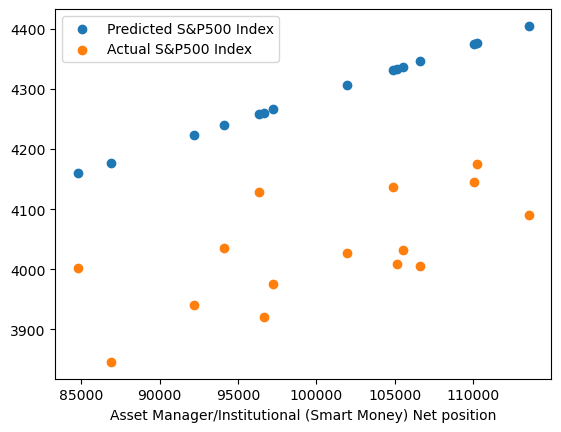

In [11]:
plt.scatter(x=x_smart_test, y=y_index_predict_df)
plt.scatter(x=x_smart_test, y=y_index_actual)
plt.xlabel('Asset Manager/Institutional (Smart Money) Net position')
classes = ['Predicted S&P500 Index', 'Actual S&P500 Index']
plt.legend(labels=classes)

plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_index_predict_df, y_index_actual)
mse = mean_squared_error(y_index_predict_df, y_index_actual)
rmse = np.sqrt(mse)
print(f"Mean absolute error: {mae:.4f}")
print(f"Mean square error: {mse:.4f}")
print(f"Root mean square error: {rmse:.4f}")

Mean absolute error: 261.2659
Mean square error: 72796.1281
Root mean square error: 269.8076


<b>Observation:</b>
    <P>Our predicted S&P500 values are always higher than the actual one. It shows the number of net long position in 2023(Test Data) is lower than 2022(Training data).</P>
<b>Suggestion to the improvement:</b>
    <P>The reason could be our input data(Net position) are in range of 85k to 120k where our predicted is from 3800 to 4500. We can apply a log() function on both X and Y axis to reduce the range.     

In [13]:
#convert the data to log scale.
x_smart_log=np.log(x_smart)
y_index_log=np.log(y_index)
lr.fit(x_smart_log,y_index_log)
smart_score_log = lr.score(x_smart_log,y_index_log)
smart_score_log


0.7375197780044298

<p><b>Remark:</b> Our R^2 or correlation dropped from 0.755 to 0.737 when both axis are in log scale. It degraded our prediction model by little and let's continue on our study.  

In [14]:
x_smart_test_log = np.log(x_smart_test)
y_index_actual_log =np.log(y_index_actual)
y_index_predict_log=lr.predict(x_smart_test_log)
y_delta_percent_log=(y_index_predict_log-y_index_actual_log)/y_index_actual_log*100

y_index_actual_log.rename(columns={"Actual S&P 500 Index": "Actual S&P 500 Index(Log)"},inplace=True)
y_delta_percent_log.rename(columns={"Actual S&P 500 Index": "Predicted - Actual S&P500 Index(% Log)"},inplace=True)
x_smart_test_log.rename(columns={"Asset Manager/Institutional (Smart Money) Net position": "Asset Manager/Institutional (Smart Money) Net position(Log)"},inplace=True)
y_index_predict_log_df = pd.DataFrame(np.array(y_index_predict_log), columns=['Predicted S&P 500 Index(Log)'])
Data_new = pd.concat([y_index_predict_log_df,y_index_actual_log,y_delta_percent_log,x_smart_test_log], axis=1)
Data_new

,Predicted S&P 500 Index(Log),Actual S&P 500 Index(Log),Predicted - Actual S&P500 Index(% Log),Asset Manager/Institutional (Smart Money) Net position(Log)
0,8.344776,8.254789,1.090114,11.372329
1,8.354098,8.279126,0.905555,11.431737
2,8.374684,8.296422,0.943326,11.562915
3,8.375283,8.302204,0.880239,11.566732
4,8.386778,8.316300,0.847466,11.639981
5,8.382114,8.337049,0.540537,11.610261
6,8.381900,8.329779,0.625728,11.608899
7,8.376902,8.295486,0.981443,11.577045
8,8.362473,8.287906,0.899710,11.485102
9,8.369876,8.300777,0.832442,11.532277


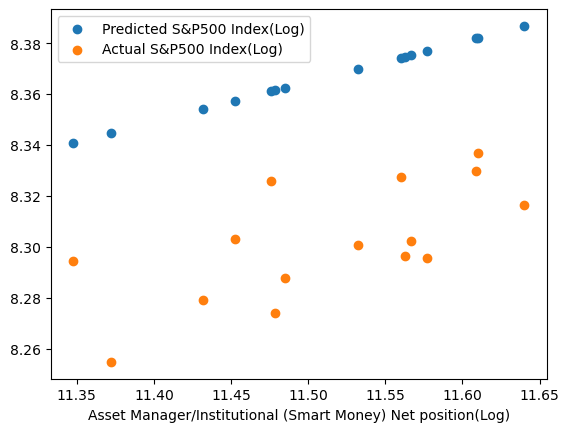

In [15]:
plt.scatter(x=x_smart_test_log, y=y_index_predict_log_df)
plt.scatter(x=x_smart_test_log, y=y_index_actual_log)
plt.xlabel('Asset Manager/Institutional (Smart Money) Net position(Log)')
classes = ['Predicted S&P500 Index(Log)', 'Actual S&P500 Index(Log)']
plt.legend(labels=classes)

plt.show()

In [17]:
mae_log = mean_absolute_error(y_index_predict_log_df, y_index_actual_log)
mse_log = mean_squared_error(y_index_predict_log_df, y_index_actual_log)
rmse_log = np.sqrt(mse_log)
print(f"Mean absolute error(log): {mae_log:.4f}")
print(f"Mean square error(log): {mse_log:.4f}")
print(f"Root mean square error(log): {rmse_log:.4f}")

Mean absolute error(log): 0.0653
Mean square error(log): 0.0045
Root mean square error(log): 0.0674


<b>Conclusion:</b> 
<p>1. Smart money has very good correlation(0.7549) base on simple linear regression.
<p>2. Using log-log scale do not improve the correlation(from 0.755 dropped to 0.7375). Although it improved mean adsolute error, mean square error and root mean square error due to lower base value. 
<p>3. Future Study-The prediction only can improve by:
<pre>
    1. Remove the outliers.
    2. Using more advanced machine learning code or extra features to predict.
</pre>
<p>3. Our study is not to get 100% accurate prediction of S&P500 index. We can still use this as an indicator to <b>Buy, Sell, or Hold</b>. If the net long position of smart money is lower that indicates the confident level is lower in the future market. We can still change our position based on the weekly changes of the smart money net long position.